Содержание этого блокнота:
- Загрузка метаинформации датасета nabla2DFT

# Основы работы в pandas

In [ ]:
%pip install rdkit
%pip install matplotlib
%pip install numpy
%pip install pandas

In [1]:
import matplotlib.pylab as plt # Для визуализации
import numpy as np # Для работы с массивами
import pandas as pd # Для работы с таблицами

In [2]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

In [3]:
# Загрузка 100 строк
summary = pd.read_csv("summary.csv", index_col=0, nrows=100)

In [4]:
summary.columns # Выводим название всех колонок

Index(['MOSES id', 'CONFORMER id', 'archive name', 'DFT TOTAL ENERGY',
       'DFT XC ENERGY', 'DFT NUCLEAR REPULSION ENERGY',
       'DFT ONE-ELECTRON ENERGY', 'DFT TWO-ELECTRON ENERGY', 'DFT DIPOLE X',
       'DFT DIPOLE Y', 'DFT DIPOLE Z', 'DFT TOTAL DIPOLE',
       'DFT ROT CONSTANT A', 'DFT ROT CONSTANT B', 'DFT ROT CONSTANT C',
       'DFT HOMO', 'DFT LUMO', 'DFT HOMO-LUMO GAP', 'DFT ATOMIC ENERGY',
       'DFT FORMATION ENERGY', 'SMILES', 'SPLITS'],
      dtype='object')

In [5]:
summary.dtypes # Изучаем типы данных в колонках

MOSES id                          int64
CONFORMER id                      int64
archive name                     object
DFT TOTAL ENERGY                float64
DFT XC ENERGY                   float64
DFT NUCLEAR REPULSION ENERGY    float64
DFT ONE-ELECTRON ENERGY         float64
DFT TWO-ELECTRON ENERGY         float64
DFT DIPOLE X                    float64
DFT DIPOLE Y                    float64
DFT DIPOLE Z                    float64
DFT TOTAL DIPOLE                float64
DFT ROT CONSTANT A              float64
DFT ROT CONSTANT B              float64
DFT ROT CONSTANT C              float64
DFT HOMO                        float64
DFT LUMO                        float64
DFT HOMO-LUMO GAP               float64
DFT ATOMIC ENERGY               float64
DFT FORMATION ENERGY            float64
SMILES                           object
SPLITS                           object
dtype: object

In [6]:
summary.SMILES # Получаем колонку по её имени
summary['SMILES'] # Получаем колонку по её имени

0        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1
1        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1
2        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1
3        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1
4        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1
                       ...                   
95    CC(c1ncncc1F)C(O)(Cn1cncn1)c1ccc(F)cc1F
96    CC(c1ncncc1F)C(O)(Cn1cncn1)c1ccc(F)cc1F
97    CC(c1ncncc1F)C(O)(Cn1cncn1)c1ccc(F)cc1F
98    CC(c1ncncc1F)C(O)(Cn1cncn1)c1ccc(F)cc1F
99    CC(c1ncncc1F)C(O)(Cn1cncn1)c1ccc(F)cc1F
Name: SMILES, Length: 100, dtype: object

In [7]:
summary.loc[54,:] # Получаем строку таблицы по индексу

MOSES id                                                            15
CONFORMER id                                                         3
archive name                         data/moses_wfns/archive_0_0_0.tar
DFT TOTAL ENERGY                                          -1331.608611
DFT XC ENERGY                                              -109.155502
DFT NUCLEAR REPULSION ENERGY                               1912.568422
DFT ONE-ELECTRON ENERGY                                   -5618.379146
DFT TWO-ELECTRON ENERGY                                    2483.385461
DFT DIPOLE X                                                 -4.414061
DFT DIPOLE Y                                                   -0.1122
DFT DIPOLE Z                                                   5.72345
DFT TOTAL DIPOLE                                               7.22872
DFT ROT CONSTANT A                                            0.013577
DFT ROT CONSTANT B                                            0.004964
DFT RO

# EDA (explaratory data analysis) для химических данных

In [8]:
# Загрузка всех строк и выбор только по одной молекуле
#df_full = pd.read_csv("summary.csv", index_col=0, nrows=1000)
df_full = pd.read_csv("summary.csv", index_col=0)


df_full = df_full[df_full['CONFORMER id'] == 0]
df_full["Br_count"] = df_full["SMILES"].str.count("Br")

## Поиск выбросов в данных

In [9]:
df_full["DFT TOTAL ENERGY"].values.max(), df_full["DFT TOTAL ENERGY"].values.min()

(7425653.505021018, -8570.473006232318)

In [10]:
df_full["DFT TOTAL ENERGY"].values.argmax()

395810

In [11]:
df_full.iloc[df_full["DFT TOTAL ENERGY"].values.argmax()]

MOSES id                                                            395824
CONFORMER id                                                             0
archive name                    data/moses_wfns/archive_small_3_1_66_0.tar
DFT TOTAL ENERGY                                            7425653.505021
DFT XC ENERGY                                                   -83.141904
DFT NUCLEAR REPULSION ENERGY                                   1416.297596
DFT ONE-ELECTRON ENERGY                                       -3112.636017
DFT TWO-ELECTRON ENERGY                                     7427433.003321
DFT DIPOLE X                                                  -2711.785226
DFT DIPOLE Y                                                  -1095.943739
DFT DIPOLE Z                                                   -218.550933
DFT TOTAL DIPOLE                                               2933.025111
DFT ROT CONSTANT A                                                0.034086
DFT ROT CONSTANT B       

## Исследование распределения признаков в данных

In [12]:
df_full = df_full[df_full['CONFORMER id'] == 0] # Выбираем только по одной конформации каждой молекулы
df_full = df_full[df_full["DFT TOTAL ENERGY"] < 0.] # Убираем из набора данных "плохо" посчитанные молекулы

In [13]:
df_full["DFT TOTAL ENERGY"].values.max(), df_full["DFT TOTAL ENERGY"].values.min()

(-752.4926037982299, -8570.473006232318)

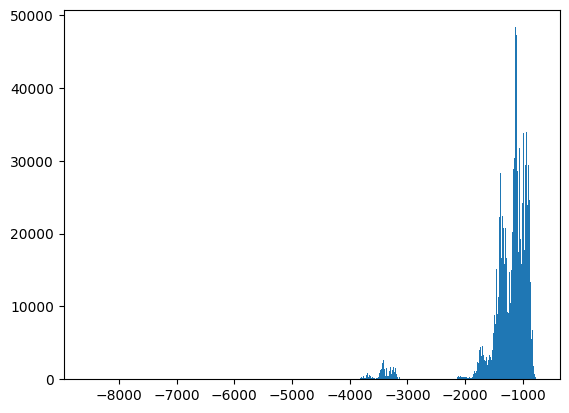

In [14]:
plt.hist(df_full["DFT TOTAL ENERGY"].values, bins=1000);

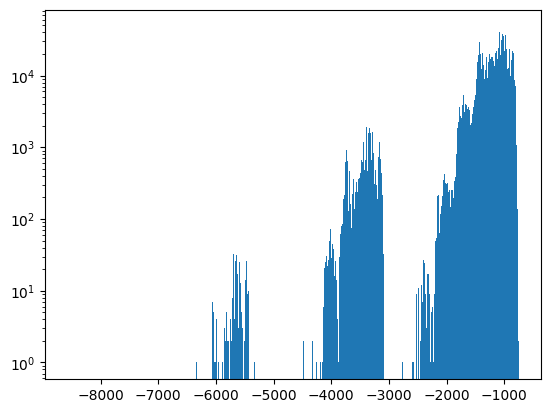

In [15]:
plt.hist(df_full["DFT TOTAL ENERGY"].values, bins=1000);
plt.yscale('log')

In [16]:
df_full[df_full["DFT FORMATION ENERGY"] < -100]

,MOSES id,CONFORMER id,archive name,DFT TOTAL ENERGY,DFT XC ENERGY,DFT NUCLEAR REPULSION ENERGY,DFT ONE-ELECTRON ENERGY,DFT TWO-ELECTRON ENERGY,DFT DIPOLE X,DFT DIPOLE Y,...,DFT ROT CONSTANT B,DFT ROT CONSTANT C,DFT HOMO,DFT LUMO,DFT HOMO-LUMO GAP,DFT ATOMIC ENERGY,DFT FORMATION ENERGY,SMILES,SPLITS,Br_count
3193994,589332,0,data/moses_wfns/archive_small_1_f_11_11.tar,-5762.892005,-143.958929,1295.677802,-7353.691357,439.100081,-821.995091,-403.481925,...,0.006490,0.004955,-19.684206,-19.631794,0.052412,-3181.195171,-2581.696834,CC(C)CC(=O)Nc1ccc(N)cc1Br,test_full_structures,1
4246479,757899,0,data/moses_wfns/archive_small_3_f_1_29.tar,-3482.577242,-128.295996,1580.192777,-4932.708248,-1.744383,1081.328367,-47.402327,...,0.002130,0.002077,-26.269565,-26.052028,0.217537,-1106.658793,-2375.918449,N#Cc1ccc(NCCNc2ccc(C(F)(F)F)cn2)nc1,train_full,0
5072644,889394,0,data/moses_wfns/archive_small_0_f_17_44.tar,-3332.756267,-128.086922,1477.870435,-5306.799622,624.287003,-1126.879455,-193.610749,...,0.005572,0.004661,-18.421593,-18.342644,0.078950,-1565.615891,-1767.140376,OCCC1CCCN(c2ncc(Cl)cc2Cl)C1,test_full_structures,0
6694675,1118669,0,data/moses_wfns/archive_small_3_f_33_37.tar,-8570.473006,-208.540954,1447.767287,-11260.058661,1450.367507,-207.013146,184.961568,...,0.011752,0.008538,-12.015946,-11.385425,0.630522,-5728.873750,-2841.599256,FC(F)(F)c1c(Br)cncc1Br,train_full,2
6959620,1150901,0,data/moses_wfns/archive_small_3_f_10_9.tar,-3341.191282,-138.183482,1696.456193,-5432.450505,533.006497,-365.989205,96.693876,...,0.003881,0.003457,-21.289906,-21.040549,0.249357,-1432.144949,-1909.046333,O=C(CSc1nc(=O)ccn1C1CC1)NCC(F)(F)F,test_full_conformations,0
7259728,1188383,0,data/moses_wfns/archive_small_3_f_17_34.tar,-5326.789701,-150.423664,1220.504535,-7177.772124,780.917373,-780.554013,7.288330,...,0.004776,0.004436,-12.850226,-12.660361,0.189866,-3199.136968,-2127.652733,Cc1c(CC(N)=O)oc2ccc(Br)cc12,train_full,1
8507749,1368958,0,data/moses_wfns/archive_small_1_f_34_9.tar,-2433.366082,-112.467487,1336.162404,-4284.020698,626.978404,210.559484,-438.945772,...,0.006170,0.004702,-14.627615,-14.521891,0.105724,-1155.380311,-1277.985771,O=c1cc(-c2ccccc2)nc(SCCCO)[nH]1,train_full,0
8866301,1422495,0,data/moses_wfns/archive_small_2_f_34_25.tar,-3162.730178,-117.425260,1486.624127,-4552.278715,20.368862,-83.533615,-81.765345,...,0.002449,0.002309,-24.696722,-24.341558,0.355164,-983.577458,-2179.152719,COC(=O)c1cccc(C#Cc2cccc(NC(N)=O)c2)c1,test_full_conformations,0


# Работа со SMILES через RDKit

In [17]:
# Загрузка всех строк и выбор только по одной молекуле
df_full = pd.read_csv("summary.csv", index_col=0, nrows=1000)
#df_full = pd.read_csv("summary.csv", index_col=0)


df_full = df_full[df_full['CONFORMER id'] == 0]
#df_full["Br_count"] = df_full["SMILES"].str.count("Br")

In [18]:
# Применяем функцию ко всем значениям в колонке 
# и пишем новую колонку
df_full["mol"] = df_full["SMILES"].apply(Chem.MolFromSmiles)

In [19]:
df_full

,MOSES id,CONFORMER id,archive name,DFT TOTAL ENERGY,DFT XC ENERGY,DFT NUCLEAR REPULSION ENERGY,DFT ONE-ELECTRON ENERGY,DFT TWO-ELECTRON ENERGY,DFT DIPOLE X,DFT DIPOLE Y,...,DFT ROT CONSTANT B,DFT ROT CONSTANT C,DFT HOMO,DFT LUMO,DFT HOMO-LUMO GAP,DFT ATOMIC ENERGY,DFT FORMATION ENERGY,SMILES,SPLITS,mol
0,1,0,data/moses_wfns/archive_0_0_0.tar,-1300.896067,-102.375307,1658.713422,-5071.516025,2214.311790,-1.806337,-3.755724,...,0.004653,0.004180,-0.311180,0.017776,0.328956,-1294.500711,-6.395356,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train_full,<rdkit.Chem.rdchem.Mol object at 0x7c89e62a42e0>
6,2,0,data/moses_wfns/archive_0_0_0.tar,-1364.634545,-110.469814,1991.334523,-5821.897826,2576.441291,-1.665626,-3.932513,...,0.003744,0.003309,-0.312438,0.007731,0.320169,-1356.890047,-7.744498,CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1,train_full,<rdkit.Chem.rdchem.Mol object at 0x7c89e62a4350>
24,3,0,data/moses_wfns/archive_0_0_0.tar,-1489.290204,-118.321976,2004.546605,-6021.266877,2645.779449,2.507964,3.215996,...,0.003967,0.002986,-0.286501,-0.009482,0.277019,-1482.252167,-7.038037,Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO,train_full,<rdkit.Chem.rdchem.Mol object at 0x7c89e62a62d0>
25,4,0,data/moses_wfns/archive_0_0_0.tar,-908.448816,-84.239483,1438.814345,-4097.345039,1834.344332,-3.324090,2.811050,...,0.010386,0.007766,-0.296957,0.030791,0.327748,-903.012271,-5.436545,Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C,train_full,<rdkit.Chem.rdchem.Mol object at 0x7c89e62a6260>
26,5,0,data/moses_wfns/archive_0_0_0.tar,-1280.522759,-97.830458,1491.817512,-4718.906635,2044.419831,2.719563,-0.769071,...,0.010013,0.006170,-0.284062,0.043597,0.327658,-1275.029875,-5.492884,CC1Oc2ccc(Cl)cc2N(CC(O)CO)C1=O,train_full,<rdkit.Chem.rdchem.Mol object at 0x7c89e62a61f0>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,300,0,data/moses_wfns/archive_0_0_2.tar,-987.731276,-94.864492,1692.028510,-4702.589147,2117.720259,0.156156,0.807975,...,0.004274,0.003643,-0.297744,-0.003745,0.293999,-980.852497,-6.878778,O=C(c1ccccn1)N1CCN(C(=O)c2ccccn2)CC1,"train_full,test_large_conformations",<rdkit.Chem.rdchem.Mol object at 0x7c89e63386d0>
988,301,0,data/moses_wfns/archive_0_0_3.tar,-970.476589,-93.622831,1588.419437,-4470.672279,2005.421772,-3.159605,2.999931,...,0.003191,0.002900,-0.303325,-0.031437,0.271888,-963.625688,-6.850900,COc1ccccc1CNC(=O)c1ccc2cnccc2n1,train_full,<rdkit.Chem.rdchem.Mol object at 0x7c89e6338660>
991,302,0,data/moses_wfns/archive_0_0_3.tar,-986.438537,-89.984389,1524.519363,-4376.747810,1955.796902,-4.733416,-0.255482,...,0.006788,0.006358,-0.302141,0.017976,0.320117,-981.167490,-5.271046,Nc1ncnc2c1ncn2C1OC(CO)C(O)C1F,train_full,<rdkit.Chem.rdchem.Mol object at 0x7c89e63385f0>
994,303,0,data/moses_wfns/archive_0_0_3.tar,-975.524814,-94.294719,1788.817500,-4878.986614,2208.969878,1.861651,2.178593,...,0.007529,0.005282,-0.289158,0.039396,0.328554,-968.360623,-7.164192,O=C(C1c2ccccc2Oc2ccccc21)N1CCOCC1,test_full_conformations,<rdkit.Chem.rdchem.Mol object at 0x7c89e6338580>


In [20]:
df_full["NumHBA"] = df_full["mol"].apply(rdMolDescriptors.CalcNumRings)

In [21]:
df_full["NumHBA"].values

array([2, 3, 2, 2, 2, 4, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 3, 2, 3, 4, 2, 2,
       3, 2, 2, 3, 3, 2, 2, 2, 1, 4, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3,
       3, 2, 2, 2, 5, 3, 3, 3, 3, 3, 4, 1, 1, 2, 3, 1, 3, 4, 3, 4, 2, 3,
       3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 1, 1, 3,
       3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3,
       3, 3, 3, 1, 3, 2, 3, 5, 2, 3, 3, 3, 4, 2, 4, 1, 4, 2, 3, 3, 3, 2,
       2, 4, 2, 2, 3, 3, 3, 3, 4, 2, 3, 4, 4, 4, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 4, 2, 2, 3, 4, 3, 4, 3, 2, 5, 2, 5, 3, 2, 3, 3, 2, 3, 3, 4, 3,
       3, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 4, 1, 3, 3, 3, 3, 2, 3, 3, 4, 3,
       2, 3, 3, 3, 2, 4, 3, 3, 3, 3, 2, 3, 3, 4, 3, 2, 2, 3, 2, 2, 2, 3,
       3, 4, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2,
       3, 2, 2, 2, 2, 4, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,